<a href="https://colab.research.google.com/github/AliyaRazyapova/Math_Statistics_4sem/blob/first-hw/first_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from collections import Counter
import math

import scipy.stats as stats

from scipy.stats import uniform # uniform distribution
from scipy.stats import binom # binomial distribution
from scipy.stats import bernoulli # bernoulli distribution
from scipy.stats import poisson # poisson distribution
from scipy.stats import expon # exponential distribution
from scipy.stats import norm # normal distribution

sns.set()
%matplotlib inline

np.set_printoptions(precision=2, suppress=True) # threshold=sys.maxsize)

import sys
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
# matplotlib.style.use('ggplot')
# plt.rcParams["figure.figsize"] = (8, 8)

### Coin toss:

$
  \text{Sample space} =
    \begin{cases}
      Head\\
      Tail\\
    \end{cases} 
$


$
  \text{Random variable (outcome)} =
    \begin{cases}
      1, & \text{if outcome is Head}\\
      0, & \text{if outcome is Tail}\\
    \end{cases}       
$

$
  \text{Probability mass function (random variable)} =
    \begin{cases}
      \frac{1}{2}, & \text{if random variable is equal to 1}\\
      \frac{1}{2}, & \text{if random variable is equal to 0}\\
    \end{cases}       
$

In [ ]:
number_of_trials = 1000
head_tail = [random.randint(0,1) for i in range(number_of_trials)]

# print('Number of Heads: {}, probability of getting Head: {}'.format(head_tail.count(1), head_tail.count(1)/number_of_trials))
# print('Number of Tails: {}, probability of getting Tail: {}'.format(head_tail.count(0), head_tail.count(0)/number_of_trials))

print(f'Number of Heads: {head_tail.count(1)}, proportion of getting Head: {head_tail.count(1)/number_of_trials}')
print(f'Number of Tails: {head_tail.count(0)}, proportion of getting Tail: {head_tail.count(0)/number_of_trials}')


Number of Heads: 494, proportion of getting Head: 0.494
Number of Tails: 506, proportion of getting Tail: 0.506


In [ ]:
Counter(head_tail)

Counter({0: 506, 1: 494})

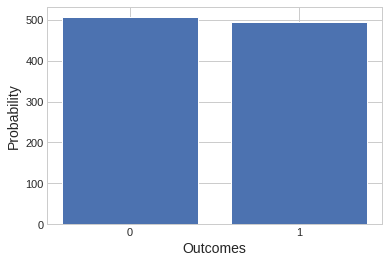

In [ ]:
plt.bar(dict(Counter(head_tail)).keys(), dict(Counter(head_tail)).values())
plt.xlabel('Outcomes',fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.xticks([0,1])
plt.show()

![image.png](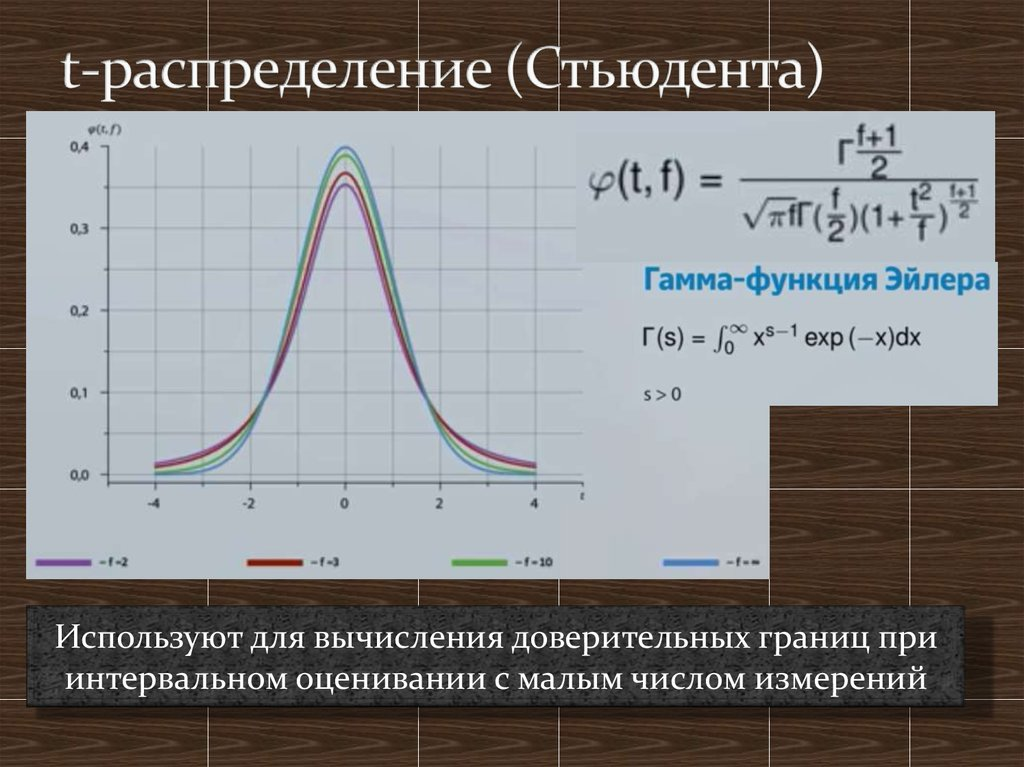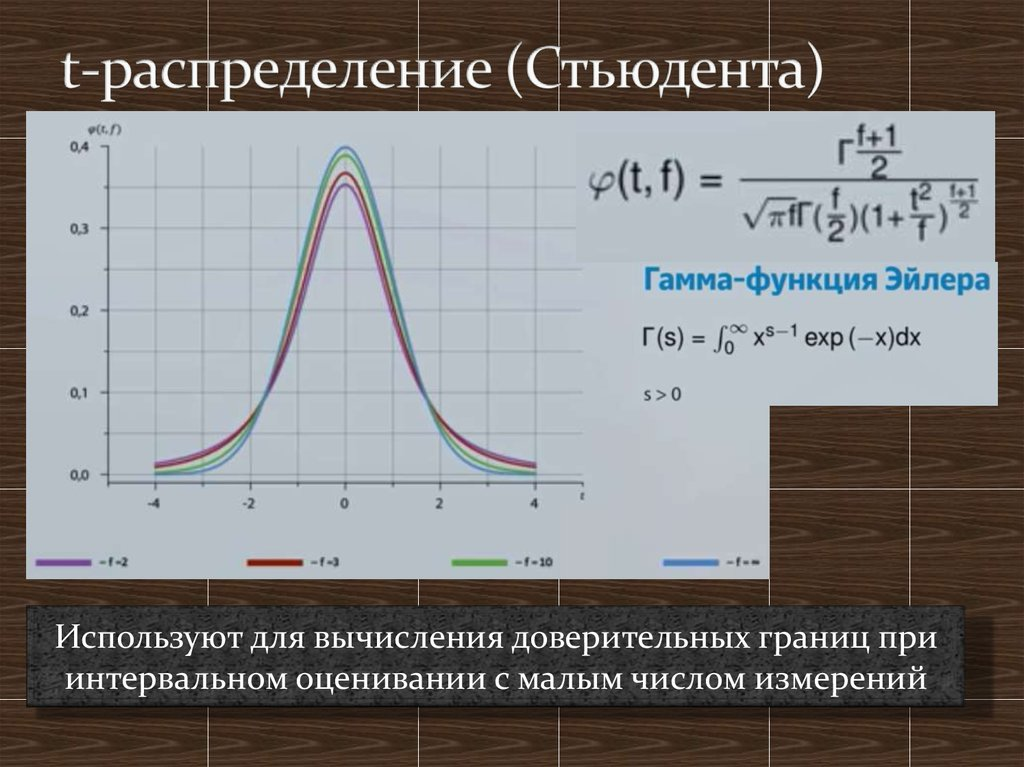)

[Probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment.

What is the probability distribution of getting heads in 5 coin tosses?

X - number of heads (random variable)

In [ ]:
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

number_of_tosses = 10
probability_of_head = 0.5
number_of_heads = []
probabilities_for_heads = []
for i in range(number_of_tosses+1):
    # prob_of_head = #to-do: for this number of heads                             #for this number of heads
    # prob_of_tail = #to-do: for this number of tails
    prob_of_outcome = nCr(10, i) * probability_of_head**i * (1 - probability_of_head)**(10-i)
    print('Probability of occurence {} heads in {} tosses is {}'.format(i, number_of_tosses, prob_of_outcome))
    number_of_heads.append(i)
    probabilities_for_heads.append(prob_of_outcome)

Probability of occurence 0 heads in 10 tosses is 0.0009765625
Probability of occurence 1 heads in 10 tosses is 0.009765625
Probability of occurence 2 heads in 10 tosses is 0.0439453125
Probability of occurence 3 heads in 10 tosses is 0.1171875
Probability of occurence 4 heads in 10 tosses is 0.205078125
Probability of occurence 5 heads in 10 tosses is 0.24609375
Probability of occurence 6 heads in 10 tosses is 0.205078125
Probability of occurence 7 heads in 10 tosses is 0.1171875
Probability of occurence 8 heads in 10 tosses is 0.0439453125
Probability of occurence 9 heads in 10 tosses is 0.009765625
Probability of occurence 10 heads in 10 tosses is 0.0009765625


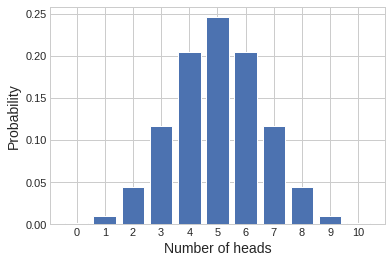

In [ ]:
plt.bar(number_of_heads, probabilities_for_heads)
plt.xlabel('Number of heads',fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.xticks(range(number_of_tosses+1))
plt.show()

In [ ]:
expected_value_for_1_toss = 1*probability_of_head + 0*(1-probability_of_head)
print('Expected value of revenue in one toss is {}'.format(expected_value_for_1_toss))

Expected value of revenue in one toss is 0.5


In [ ]:
n = 6
expected_value_for_n_toss = 0
for i in range(n+1):
    expected_value_for_n_toss += 0.5**n * nCr(n,i) * i
print('Expected value of revenue in {} toss is {}'.format(n, expected_value_for_n_toss))

Expected value of revenue in 6 toss is 3.0


Find expected value and variance of ξ:

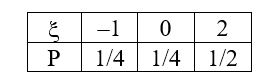

In [ ]:
expected_value = -1 * 1/4 + 0 * 1/4 + 2 * 1/2
expected_value_of_square = 1 * 1/4 + 0 * 1/4 + 4 * 1/2
variance = expected_value_of_square - expected_value**2
print('Expected value: {}. Variance: {}'.format(expected_value, variance))

Expected value: 0.75. Variance: 1.6875


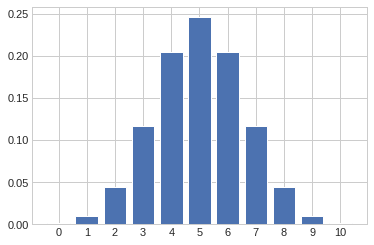

In [ ]:
plt.bar(number_of_heads, probabilities_for_heads) #just an example of discrete distribution
plt.xticks(range(number_of_tosses+1))
plt.show()

## Пример с банкнотами 


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/a1ip/Abbakumov/master/Lesson_02/swiss_bank_notes.csv', index_col=0)
df.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


<strong/>Status</strong> - the status of the banknote: genuine or counterfeit

<strong/>Length</strong> - Length of bill (mm)

<strong/>Left</strong> - Width of left edge (mm)

<strong/>Right</strong> - Width of right edge (mm)

<strong/>Bottom</strong> - Bottom margin width (mm)

<strong/>Top</strong> - Top margin width (mm)

<strong/>Diagonal</strong> - Length of diagonal (mm)

In [ ]:
df.describe()

,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


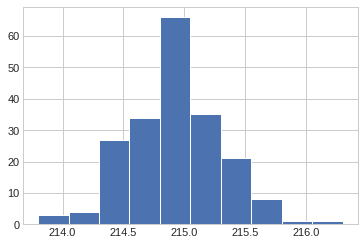

In [ ]:
df['Length'].hist()
# y-axis = number of banknotes
# x-axis = length

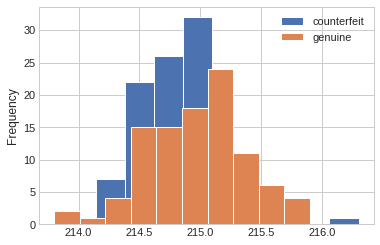

In [ ]:
df.groupby('Status')['Length'].plot.hist()
plt.legend()

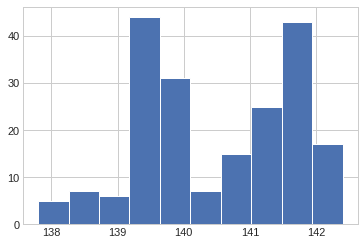

In [ ]:
df['Diagonal'].hist()

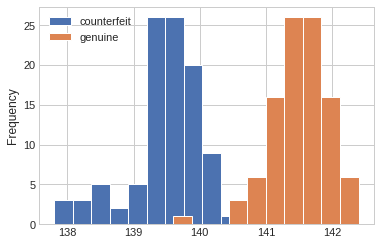

In [ ]:
df.groupby('Status')['Diagonal'].plot.hist()
plt.legend()
plt.show()

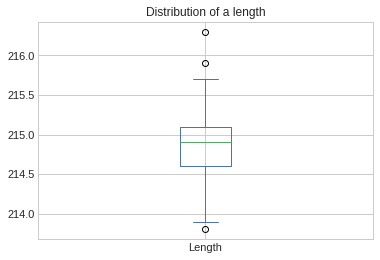

In [ ]:
df['Length'].plot(kind='box')
plt.title('Distribution of a length')
plt.show()

In [ ]:
df['Length'].describe()

count    200.000000
mean     214.896000
std        0.376554
min      213.800000
25%      214.600000
50%      214.900000
75%      215.100000
max      216.300000
Name: Length, dtype: float64

## Time to practice




## ЗАДАЧА 1 


In [ ]:
disasters = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/master/ch_02/data/earthquakes.csv')
disasters.head()

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...


In [ ]:
earthquakes = disasters[disasters['type'] == 'earthquake']
earthquakes.head()

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.008693,NaN,85.0,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.020030,NaN,79.0,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...
2,NaN,4.4,37389194,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.021370,28.0,21.0,",ci37389194,",3.42,ml,...,",ci,",automatic,1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,earthquake,",dyfi,focal-mechanism,geoserve,nearby-cities,o...",-480.0,1539536756176,https://earthquake.usgs.gov/earthquakes/eventp...
3,NaN,NaN,37389186,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.026180,NaN,39.0,",ci37389186,",0.44,ml,...,",ci,",automatic,1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.0,1539475196167,https://earthquake.usgs.gov/earthquakes/eventp...
4,NaN,NaN,73096941,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.077990,NaN,192.0,",nc73096941,",2.16,md,...,",nc,",automatic,1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,scit...",-480.0,1539477547926,https://earthquake.usgs.gov/earthquakes/eventp...


In [ ]:
earthquakes['alert'].fillna('others', inplace=True)
earthquakes['alert'].unique()

array(['others', 'green', 'red'], dtype=object)

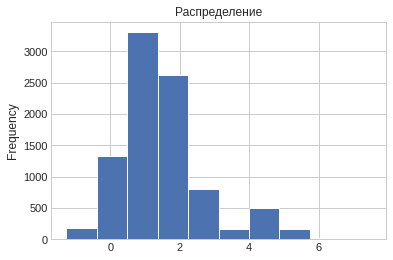

In [ ]:
earthquakes[(earthquakes['magType'] == 'mb') | (earthquakes['magType'] == 'ml')]
#to do - take only mb and ml magTypes - выбрать только типы mb и ml из Magtypes
#to do - постороить гистограмму
earthquakes['mag'].plot.hist()

plt.title('Распределение')
plt.show()

## ЗАДАЧА 2 Титаник


In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


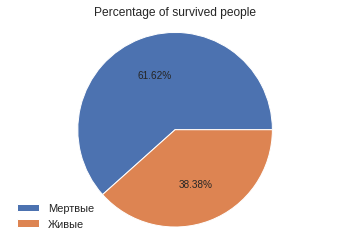

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

fig, ax = plt.subplots(1)

ax.pie(titanic['Survived'].value_counts(), autopct='%1.2f%%'
                                   )
ax.set_title('Percentage of survived people')
ax.axis('equal')
ax.legend(labels= ['Мертвые', 'Живые'],
            framealpha=0)
ax.set_ylabel('')
plt.show()

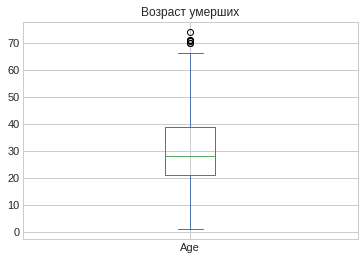

In [ ]:
ax = titanic[titanic['Survived'] == False]
ax['Age'].plot(kind='box')

# ax.get_figure().suptitle('')

plt.title('Возраст умерших')
plt.show()

In [ ]:
ages_1_class = titanic[titanic['Pclass'] == 1]['Age']
ages_1_class.fillna(0, inplace=True)

ages = sorted([age for age in ages_1_class])

def percents(percent, source):
  if ((percent < 0) or (percent > 1)):
    raise Exception('Неправильный процент')
  a = percent * (len(source) + 1)
  if a.is_integer():
    return source[a]
  return (source[int(a) - 1] + source[int(a)]) / 2

age_25th_percentile = percents(0.25, ages)
age_75th_percentile =  percents(0.75, ages)
print('25th percentile: {}, 75th percentile: {}'.format(age_25th_percentile, age_75th_percentile))

25th percentile: 21.5, 75th percentile: 47.5


In [ ]:
titanic[titanic['Pclass']==1].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200
